In [1]:
# ME EN 4650  Lab1: Water Cooling Tower    Ryan Dalby    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matlab.engine # Must install from matlab installation direcotry using: cd "matlabroot\extern\engines\python" && python setup.py install 


In [2]:
# Collected Data 
T_amb = 20 # Ambient temperature in lab in deg C
P_atm_mmHg = 777 - 120.6 # Barometric pressure in lab (subtraction adjusts for reading being taken in Salt Lake City) in mm Hg
P_atm = P_atm_mmHg * 133.322 # Barometric pressure in lab in Pa 
P_atm_kpa = P_atm/1000 # Barometric pressure in lab in kPa 
Q_dot_in = 1.5 + 0.1 # Input power to water heaters plus the power to the water pump in kW
D_makeup = 6.905 # Inside diameter of makeup water tank in cm

# Each index corresponds to the experiment 1, 2, and 3 respectively
m_dot_water_in = np.array([17.0,30.0,42.0]) # Inlet water flow speed in g/s
T1 = np.array([22.4,22.7,22.8]) # Air inlet A (dry bulb temp) in deg C
T2 = np.array([11.3,11.5,11.4]) # Air inlet A (wet bulb temp) in deg C
T3 = np.array([21.9,22.5,22.7]) # Air outlet B (dry bulb temp) in deg C
T4 = np.array([21.5,22.4,22.5]) # Air outlet B (wet bulb temp) in deg C
T5 = np.array([34.6,29.1,26.8]) # Water inlet (air outlet) temp in deg C
T6 = np.array([15.5,16.6,17.6]) # Water outlet (air inlet) temp in deg C
t1 = np.array([18.3,21.3,22.5]) # Air @ H (wet bulb temp) in deg C
t2 = np.array([20.1,21.9,23.0]) # Air @ H (dry bulb temp) in deg C
t3 = np.array([21.9,24.0,24.0]) # Water temp @ H in deg C
t4 = np.array([16.3, 18.8, 19.8]) # Air @ G (wet bulb temp) in deg C
t5 = np.array([17.8,20.2,20.9]) # Air @ G (dry bulb temp) in deg C
t6 = np.array([17.4,20.5,21.4]) # Water temp @ G in deg C
t7 = np.array([14.5,17.3,18.4]) # Air @ F (wet bulb temp) in deg C
t8 = np.array([19.5,20.3,21.1]) # Air @ F (dry bulb temp) in deg C
t9 = np.array([14.4,17.4,18.9]) # Water temp @ F in deg C
delta_P_B = np.array([10.0,10.0,10.0]) # Pressure drop between air inlet A and air outlet B in mm H20
L1_inches = np.array([10.0,10.0,10.0]) # Initial height of makeup water in inches
L1 = L1_inches * 2.54 # Initial height of makeup water in cm
L2_inches = np.array([(9+13/16),(9+11/16),(9+5/8)]) # Final height of makeup water in inches 
L2 = L2_inches * 2.54 # Final height of makeup water in cm
t_exp = np.array([300,300,300]) # Time of experiment in seconds

z_height = np.array([0.0,24.8,48.3,71.8,100.0]) # Thermocouple height positions, A, F, G, H, B respectively in cm
z_height_m = z_height/100
T_water = np.array([T6,t9,t6,t3,T5]) # Water temperature indexed respectively with thermocouple height values for each water flow rate in deg C
T_wetbulbair = np.array([T2,t7,t4,t1,T4]) # Wet bulb temperature indexed respectively with thermocouple height values for each water flow rate in deg C
T_drybulbair = np.array([T1,t8,t5,t2,T3]) # Dry bulb temperature indexed respectively with thermocouple height values for each water flow rate in deg C

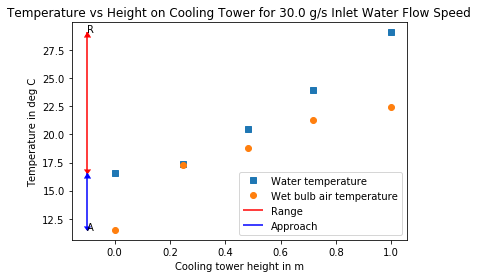

In [3]:
# Plot 1a
R = T5 - T6 # Range in deg C
A = T6 - T2 # Approach in deg C

range_and_approach_x_loc = -0.1 # Where the range and approach will be plotted on x axis in m
plt.figure()
plt.plot(z_height_m, T_water[:,1], 's')
plt.plot(z_height_m, T_wetbulbair[:,1], 'o')
plt.vlines(range_and_approach_x_loc, T5[1], T6[1], 'r')
plt.vlines(range_and_approach_x_loc, T6[1], T2[1], 'b')
plt.xlabel('Cooling tower height in m')
plt.ylabel('Temperature in deg C')
plt.legend(['Water temperature', 'Wet bulb air temperature', 'Range', 'Approach'])
plt.plot(range_and_approach_x_loc, T5[1], 'r', marker=6)
plt.plot(range_and_approach_x_loc, T6[1], 'r', marker=7)
plt.plot(range_and_approach_x_loc, T6[1], 'b', marker=6)
plt.plot(range_and_approach_x_loc, T2[1], 'b', marker=7)
plt.text(range_and_approach_x_loc, T5[1], 'R')
plt.text(range_and_approach_x_loc, T2[1], 'A')
plt.title('Temperature vs Height on Cooling Tower for 30.0 g/s Inlet Water Flow Speed')
plt.show()

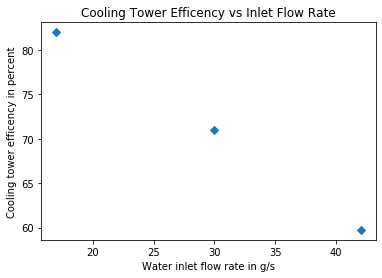

In [4]:
# Plot 1b
eta = R/(R+A) * 100  # efficency in percent
plt.figure()
plt.plot(m_dot_water_in, eta, 'D')
plt.xlabel('Water inlet flow rate in g/s')
plt.ylabel('Cooling tower efficency in percent')
plt.title('Cooling Tower Efficency vs Inlet Flow Rate')
plt.show()

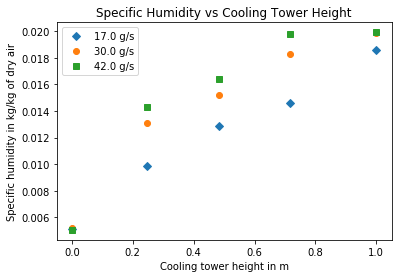

In [5]:
# Plot 1c
eng = matlab.engine.start_matlab()
eng.addpath(os.path.abspath(os.getcwd()))
plotting_styles = ['D','o', 's']
plt.figure()
# These are the values we will need from the psychometric chart from Matlab for the various m_dot_water_in flow rates
omega_for_m_dot_water_in = [] # Humidity ratio in kg/kg of dry air
v_for_m_dot_water_in = [] # Specific volume in m^3/kg of dry air
h_for_m_dot_water_in = [] # Enthalpy in J/kg of dry air
for i in range(m_dot_water_in.size):
    omega = []
    v = []
    h = []
    for j in range(T_wetbulbair[:,1].size):
        matlab_output = eng.Psychrometrics('tdb',float(T_drybulbair[j,i]), 'twb', float(T_wetbulbair[j,i]), 'p', float(P_atm_kpa), nargout=7)
        omega.append(matlab_output[1])
        v.append(matlab_output[5])
        h.append(matlab_output[3])
    plt.plot(z_height_m, omega, plotting_styles[i])
    omega_for_m_dot_water_in.append(omega)
    v_for_m_dot_water_in.append(v)
    h_for_m_dot_water_in.append(h)
plt.legend(['{} g/s'.format(m_dot_water_in[n]) for n in range(m_dot_water_in.size)])
plt.xlabel('Cooling tower height in m')
plt.ylabel('Specific humidity in kg/kg of dry air')
plt.title('Specific Humidity vs Cooling Tower Height')
plt.show()
eng.quit()
 
# Use these values found from psychrometrics later
omega = np.array(omega_for_m_dot_water_in).transpose() # Humidity ratio in kg/kg of dry air
v = np.array(v_for_m_dot_water_in).transpose() # Specific volume in m^3/kg of dry air
h = np.array(h_for_m_dot_water_in).transpose() # Enthalpy in J/kg of dry air

# Previous empirical calculation before using psychometrics
# for i in range(m_dot_water_in.size):
#     Psi = (np.exp(1.8096 + (17.2694*T_wetbulbair[:,i])/(237.3+T_wetbulbair[:,i])) - (7.866e-4*P_atm*(T_drybulbair[:,i]-T_wetbulbair[:,i])*(1+T_wetbulbair[:,i]/610)))\
#         /(np.exp(1.8096 + (17.2694*T_drybulbair[:,i])/(237.3+T_drybulbair[:,i])))
#     P_g = 610.78*np.exp(17.2694*T_drybulbair[:,i]/(T_drybulbair[:,i]+238.3)) # Partial pressure of water vapor in Pa
#     P_v = Psi * P_g
#     P_a = P_atm - P_v
#     omega = 0.622 * (P_v / P_a)
#     plt.plot(range_and_approach_x_loc,omega,plotting_styles[i])

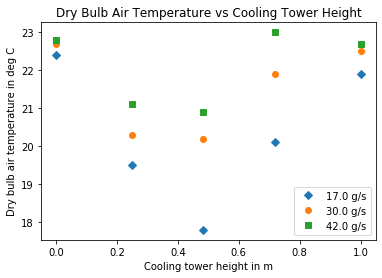

In [6]:
# Plot 1d
plt.figure()
for i in range(m_dot_water_in.size):
    plt.plot(z_height_m, T_drybulbair[:,i], plotting_styles[i])
plt.legend(['{} g/s'.format(m_dot_water_in[n]) for n in range(m_dot_water_in.size)], loc=4)
plt.xlabel('Cooling tower height in m')
plt.ylabel('Dry bulb air temperature in deg C')
plt.title('Dry Bulb Air Temperature vs Cooling Tower Height')
plt.show()

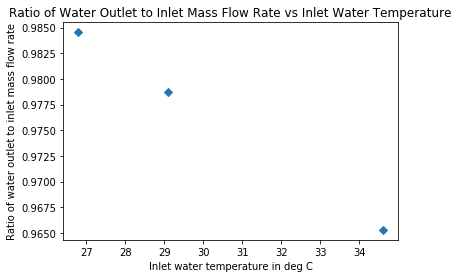

In [7]:
# Plot 1e
omega_air_outlet = omega[4,:] 
omega_air_inlet = omega[0,:]
va_air_inlet = v[0,:] # Specific volume of dry air, taken at air inlet, for a given m_dot_water_in
m_dot_a = 0.0137 * np.sqrt(delta_P_B/((1+omega_air_inlet) * va_air_inlet)) # In kg/s
m_dot_vapor_out = (omega_air_outlet * m_dot_a)*1000 # In g/s
m_dot_vapor_in = (omega_air_inlet * m_dot_a)*1000 # In g/s
m_dot_water_out = m_dot_water_in + m_dot_vapor_in - m_dot_vapor_out
plt.figure()
plt.plot(T_water[4,:], (m_dot_water_out/m_dot_water_in), 'D')
plt.xlabel('Inlet water temperature in deg C')
plt.ylabel('Ratio of water outlet to inlet mass flow rate')
plt.title('Ratio of Water Outlet to Inlet Mass Flow Rate vs Inlet Water Temperature')
plt.show()

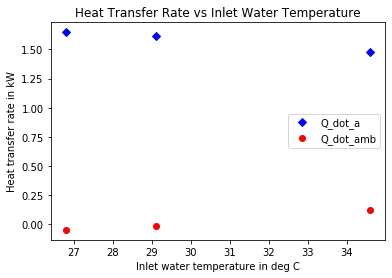

In [8]:
# Plot 1f
plt.figure()
h_air_outlet = h[4,:]
h_air_inlet = h[0,:]
Q_dot_a = (m_dot_a * (h_air_outlet-h_air_inlet))/1000 # in kW
Q_dot_amb = Q_dot_in - Q_dot_a
plt.plot(T_water[4,:], Q_dot_a , 'bD')
plt.plot(T_water[4,:], Q_dot_amb , 'ro')
plt.legend(['Q_dot_a', 'Q_dot_amb'])
plt.xlabel('Inlet water temperature in deg C')
plt.ylabel('Heat transfer rate in kW')
plt.title('Heat Transfer Rate vs Inlet Water Temperature')
plt.show()

In [9]:
# 2c
m_dot_makeup_estimate = ((np.pi * D_makeup**2 * (L1-L2))/4.0)/t_exp # in g/s
m_dot_makeup = m_dot_water_in-m_dot_water_out # in g/s
print('{} g/s is the rough estimate of m_dot_makeup, while the better estimate is {} g/s'.format(m_dot_makeup_estimate, m_dot_makeup))

[0.05944714 0.09907857 0.11889428] g/s is the rough estimate of m_dot_makeup, while the better estimate is [0.59012655 0.6392563  0.64925354] g/s
